## SVM


### What is svm?
SVM的核心目标是找到一个最优的决策边界（在二维情况下是一条线，在高维情况下是一个超平面），这个边界能够：

最大化不同类别之间的间隔（margin）

正确分类或尽可能正确分类训练数据

### 硬间隔

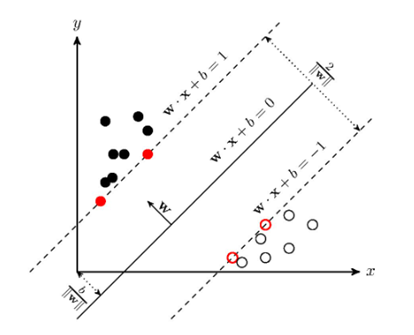

### 软间隔

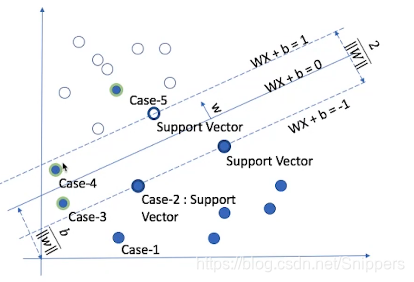

In [1]:
# 导入包

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

 
# use seaborn plotting defaults
import seaborn as sns; sns.set()


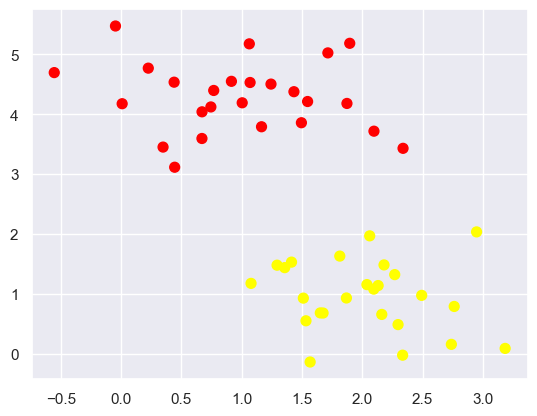

In [3]:
# 创建模拟数据集
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50,               #样本数量
                centers=2,                   #分类数目
                random_state=0,               #随机种子
                cluster_std=0.60)             #每个类别的方差 (用于控制点的分散程度)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


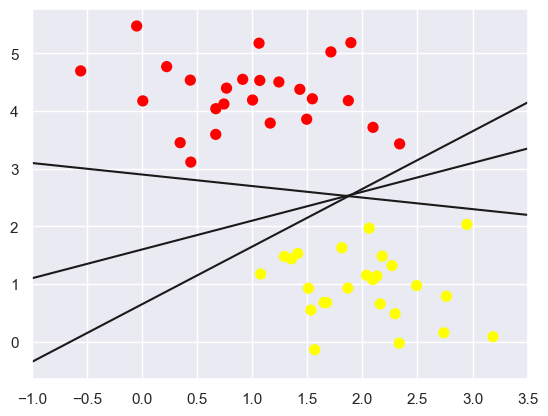

In [4]:
# 分类,绘制可能的边界
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
 
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
 
plt.xlim(-1, 3.5);


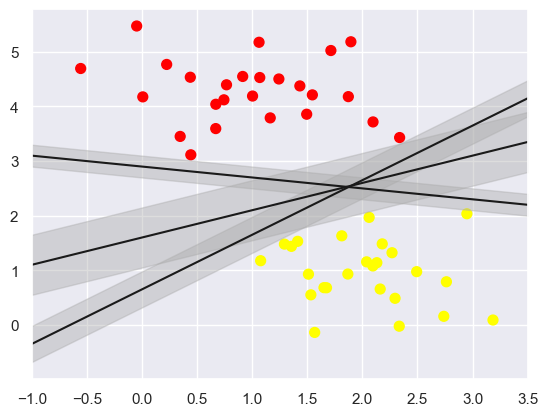

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
 
plt.xlim(-1, 3.5);


In [6]:
 
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [16]:

#绘制SVM的决策边界

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格点
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # 计算每个点到决策边界的符号距离
    '''
    0:在边界上
    正值:属于正类
    负值:属于负类
    '''
    P = model.decision_function(xy).reshape(X.shape)
    
    # 绘制等高线
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # 绘制支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=800, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


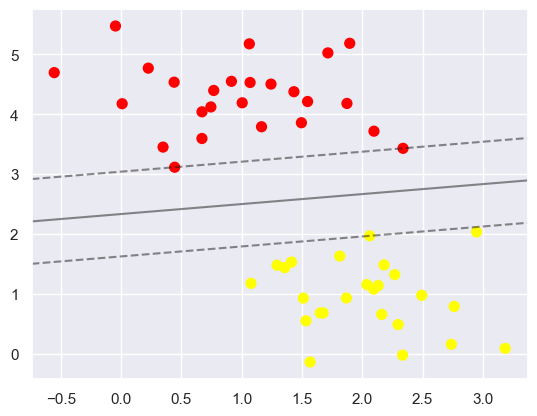

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [31]:
#使用SVM进行人脸识别
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
#是一个 Bunch 对象（类似字典），包含以下关键属性：
#images:实际图像数据（三维数组，形状为 (n_samples, height, width)）。
#data:二维数组,每行是展平后的图像像素(height * width 维特征）。
#target:每张图像对应的人物标签（数字编码）。
#target_names:人物名称（字符串数组，与 target 的数字标签对应）

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


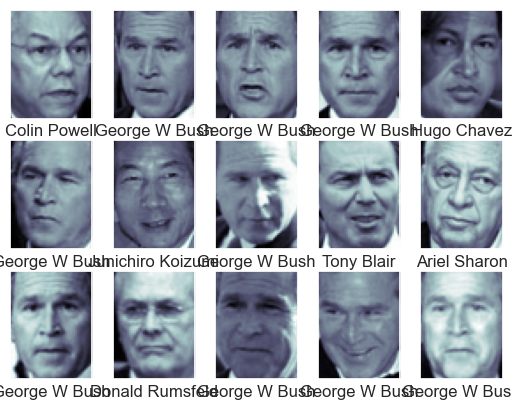

In [33]:

# 画图，可视化
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


In [34]:

#
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
#kernel='linear':使用线性核函数(适合PCA降维后的数据)。
#class_weight='balanced'：自动调整类别权重，处理数据不平衡问题（如某些人物图片较少）


model = make_pipeline(pca, svc)
#make_pipeline:将PCA和SVC按顺序连接成一个整体模型
#输入数据 → PCA降维 → 转换后的数据 → SVM分类 → 输出预测结果

In [35]:
#划分数据集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)


In [ ]:
# 硬间隔

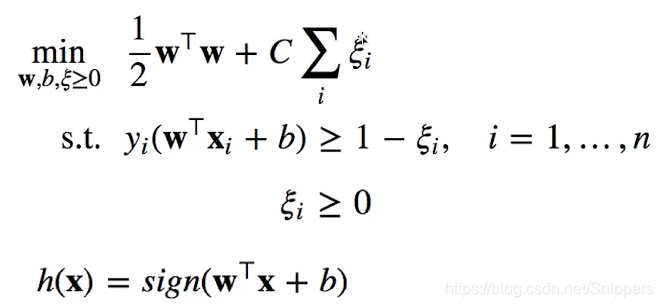

In [37]:
# 网格搜索
from sklearn.model_selection import GridSearchCV
 
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)
 
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 49.8 s, sys: 9.69 s, total: 59.5 s
Wall time: 9.1 s
{'svc__C': 1}


In [38]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


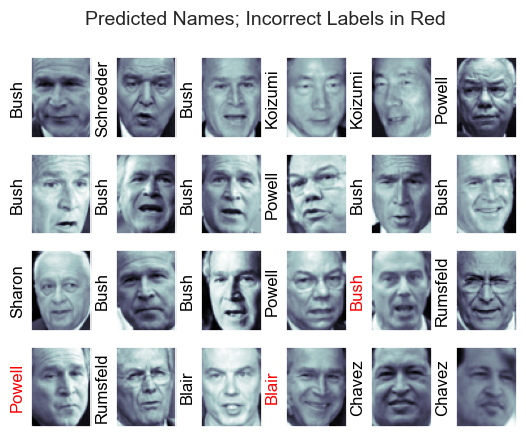

In [39]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.67      0.65        15
     Colin Powell       0.78      0.85      0.82        68
  Donald Rumsfeld       0.69      0.71      0.70        31
    George W Bush       0.85      0.79      0.81       126
Gerhard Schroeder       0.68      0.74      0.71        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.73      0.76      0.74        42

         accuracy                           0.78       337
        macro avg       0.77      0.78      0.77       337
     weighted avg       0.79      0.78      0.78       337



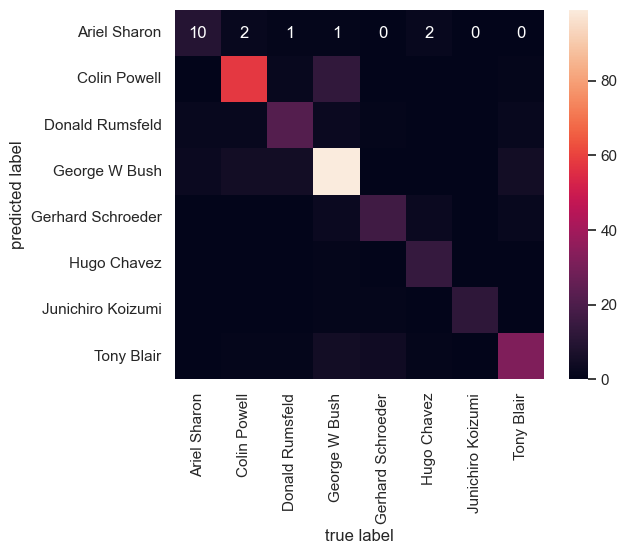

In [70]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


### kernel SVM


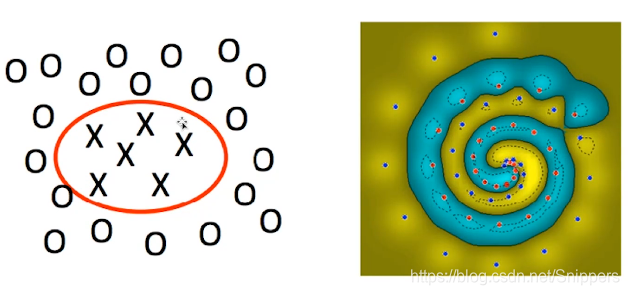

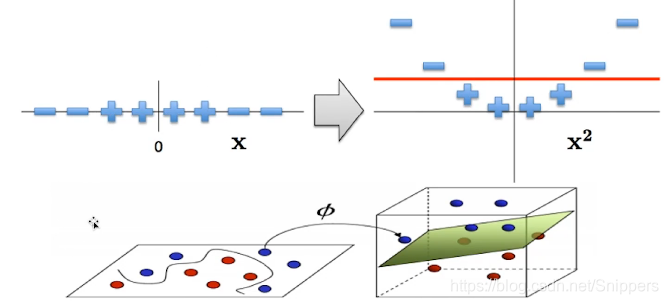
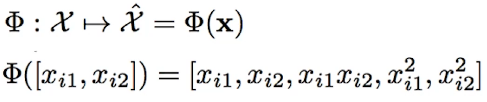


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

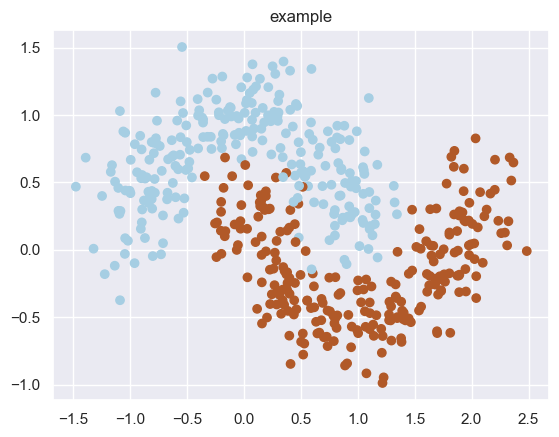

In [73]:
# 生成月亮形数据（非线性可分）
X, y = datasets.make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("example")
plt.show()

In [74]:
# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征(SVM对尺度敏感)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# 使用RBF核(高斯核)
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0, random_state=42)

#kernel='rbf'：径向基函数（高斯核），适合非线性数据。
#gamma:控制核函数的宽度（值越大，决策边界越复杂）。
#C:正则化参数(值越大，对误分类的惩罚越强)。


# 训练模型
svm_rbf.fit(X_train, y_train)

SVC(gamma=0.5, random_state=42)

In [76]:
# 预测测试集
y_pred = svm_rbf.predict(X_test)

# 分类报告
print("分类报告：\n", classification_report(y_test, y_pred))

# 混淆矩阵
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))

# 准确率
print("测试集准确率：", svm_rbf.score(X_test, y_test))

分类报告：
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

混淆矩阵：
 [[75  0]
 [ 4 71]]
测试集准确率： 0.9733333333333334


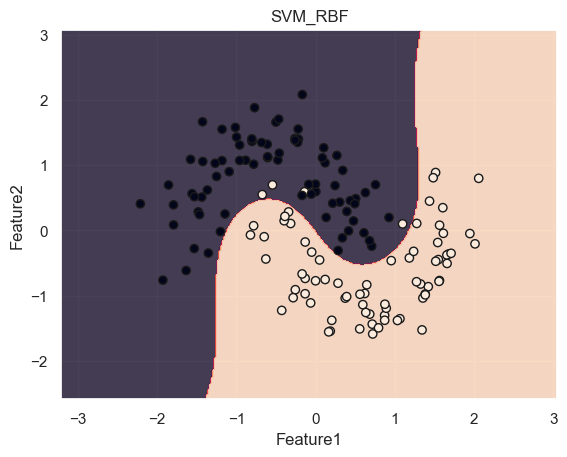

In [78]:
def plot_decision_boundary(model, X, y):
    # 生成网格点
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 预测网格点类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界和数据点
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM_RBF")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

plot_decision_boundary(svm_rbf, X_test, y_test)